In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm as LogNorm
from matplotlib import cm
import numpy as np
import pickle

# Introduction to Analysis of LHC's Search for Boosted Higgs Bosons

To be able to understand the finer workings of this experiment, in-depth knowledge concerning the standard model and relevant experimental designs are required. Since this is beyond the scope of the lab, I will briefly summarize this background information before explaining the significance of the data at hand.

Particle physics and its standard model describes the dynamics and interactions of the fundamental components of matter. It accounts for three of the four forces (strong, weak, and electromagnetic) resulting from the proposed symmetries and constraints placed on particle transformations. These forces (and it's more helpful to consider the fields that create them) have associated gauge bosons - particles which act as messengers for any change in field. A common example is an electron rapidly oscillating back and forth in a space. The electric field that results from the presence of a charged particle is being altered as the particle changes its position, and this information must be communicated to the surrounding space. If rapid enough, this information is carried in the form of radiation, aka the photon - the gauge boson for the electromagnetic force. 

Gauge invariance theory gave rise to the hypothesis that the weak force's gauge bosons (W and Z) should have zero mass, when experimentally it was determined that they actually have 80 times the mass of the proton. This flaw in the standard model was rectified with the Higgs Mechanism, allowing for a quantum field called the Higgs field to permeate all space in which there is a charged field with a vacuum expectation value. Proposed in 1962 by Philip Warren Anderson, It leads to spontaneous breaking of electroweak symmetry by means of Tachyon condensation in which a system can lower its energy by spontaneously producing particles.

Experimental particle physics utilizes accelerators often intended to measure the results of collisions between particles. The behavior of particles of a wide variety of quantum properties and environments are how we confirmed the standard model in the first place, but in a modern context, we use them to search for the rarest of interactional results. Rare, because quantum is a probabilistic theory, and our rare events occur alongside other more common events that have resulted from the same interaction. Specifically, at the Large Hadron Collider (LHC), they collide bunches of protons (at $1.2 \times 10^{11}$ protons per bunch) to produce roughly a billion proton-proton collisions every second. Out of these collisions, they only get about 20 hard collisions, which are head-on collisions where there is a large momentum transfer principally involving two constituent quarks and gluons. In such cases, we care more about results of collisions flying off at sharp angles, because along the beam are uninteresting interactions where protons barely glance off of one another. In this way, we can narrow down our discovery sensitivity. This is also why we are given transverse momentum as a feature (perpendicular to the beam). 

At LHC, the detector "producing" our data in question is called ATLAS: a cylinder-shaped, complicated machine measuring 44m in length and 22m in diameter. It is referred to as a $4 \pi$ (solid angle) detector, which is to say, it can detect a particle going off at any direction. It combines low-level info from several types of sensors to extrapolate what the resulting particles are, post-collion. ATLAS has four main segments: the Tracking Chamber, EM Calorimeter, Hadronic Calorimeter, and the Muon Chamber. With these, we should, in theory, detect everything but neutrinos. The innermost chamber (Tracking) is made of silicon which ionizes in the path of the particle - and if the particle is charged, the magnetic field dispersed throughout ATLAS will curve that path. Then, the EM Calorimeter intends to absorb particles (namely photons and electrons/positrons) through small interactions which reveal the total energy (e.g. lead interacting with gamma rays) - which of course gets complicated considering multiple particles can enter the chamber at once - which is when clustering algorithms become useful. The Hadronic Calorimeter should do the same thing but with pions, protons, and neutrons.

In this dataset, we are conducting an analysis of the jets that occur from quarks and gluons. These particles have color charge (charge of the strong force). Color-charged particles cannot exist in isolation, so if they are ever separated, the strong force becomes so strong that a Hadron is created. This occurs in a two-step process; the first being showering, the second hadronization. Showering is when a single quark or gluon that have resulted from hard pp collisions emits another quark or gluon. When the energy is small enough, hadronization occurs, when quarks and gluons become bound into colorless hadrons (pions or kaons, usually) in the form of jets. This is a complicated stream of information, but the data we are given of the identified jets (higgs or background) has 14 features, from which we can learn about jet substrcture, leading us to the properties of the particles which produce it. In the case of Higgs boson, it will decay into two bottom quarks.

The features are:

    pT : Transverse Momentum, or the momentum of the particle in the direction perpendicular to the beam . I am using the dataset with pT range of 250-500 GeV

    eta/phi : these are used to define the space in which jet constituents are found. For each ith constituent, we sum up the product of its position (eta or phi) and energy and divide by the sum of its energy to get the energy-weighted center in either phi or eta with respect to the jet

    mass : this depends primarily on the energy of the jet constituents and their angular separations. It becomes slightly less accurate with increasing pT. units = GeV

    ee2/ee3 : these refer to 2 or 3-point energy-energy correlation functions, used to understand N-prong jet substructure without a subjet identification method (like t1/t2/t3 below). It only uses information about the energies and pair-wise angles of jet constituents, allowing the two-point generalized energy correlator to probe small-scale collinear splittings (useful for quark/gluon discrimination), and allowing the three-point to identify QCD jets vs jets with two branches of color-singlet decay (aka boosted electroweak bosons, W/Z/H), depending on ratio of mass and pT. This defines a multi-dimensional phase space populated by signal and background jets, divided into 1 and 2 prong regions with a boundary corresponding to the curve e3 = e2 cubed. A large value of ee2 means there is a hard split

    d2 : a way to distinguish between two prong jets, given by e3 / (e2 cubed). signal jets should have small d2, while background jets should have large d2

    angularity : after finding the angle theta of the vector in (eta, phi) space that passes through the energy-weighted center of the jet face (resulting in minimal positional variance of constituents), we use it to define this feature, sensitive to the degree of symmetry in the energy flow. The formula is given by 
$$\frac{1}{M} \Sigma_{i} E_{i}\sin^{a}{\theta_{i}}[1-\cos{\theta_{i}}]^{1-a}$$
    
                where a is a parameter expressing position of radiation (a<0 near edges or a>0 at the core)

    t1/t2/t3 : This is a measure of N-subjettiness, the physical distance between branches. At high energies, particles become highly collimated, meaning they travel in almost exactly the same direction. This results in fat jets that contain multiple branches. This feature in particular refers to the average distance from an individual particle to another in the same branch, if they were to be grouped into either one, two, or three branches.

    t21/t32 : The distance tN will inevitably grow smaller with more groupings of branches, so we take the ratio to illutrate whether there is a large enough difference between cases to make the claim of one being a better fit than the other. For instance, if t32 is close to 1, t2 is probably a good approximation. if t32 is much smaller than 1, then t3 is the better approximation.

    KtDeltaR : refers to a clustering algorithm which groups constituents of large-R jets (R=1.0) into subjets of R=0.2, removing any subjets with a pT less than 5% of the parent pT (trimming and requiring the large-R jet to have pT > 250 GeV, as seen in our dataset). The addiction of DeltaR refers to the angular separation of two subjets clustered by kT.

## Cool, let's start!

The pickle module implements binary protocols for serializing and de-serializing a Python object structure. The data format used by pickle is Python-specific. This has the advantage that there are no restrictions imposed by external standards such as JSON or XDR (which can’t represent pointer sharing); however it means that non-Python programs may not be able to reconstruct pickled Python objects.

In [2]:
file1 = open ("qcd_100000_pt_250_500.pkl",'rb')
file2 = open ("higgs_100000_pt_250_500.pkl",'rb')

qcd = pickle.load(file1)
higgs = pickle.load(file2)

# list all keys of the files
print(qcd.keys())
print(higgs.keys())

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')
Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')


In [3]:
#identical to higgs - can be used for both
keys = qcd.keys()
print(len(keys))

14


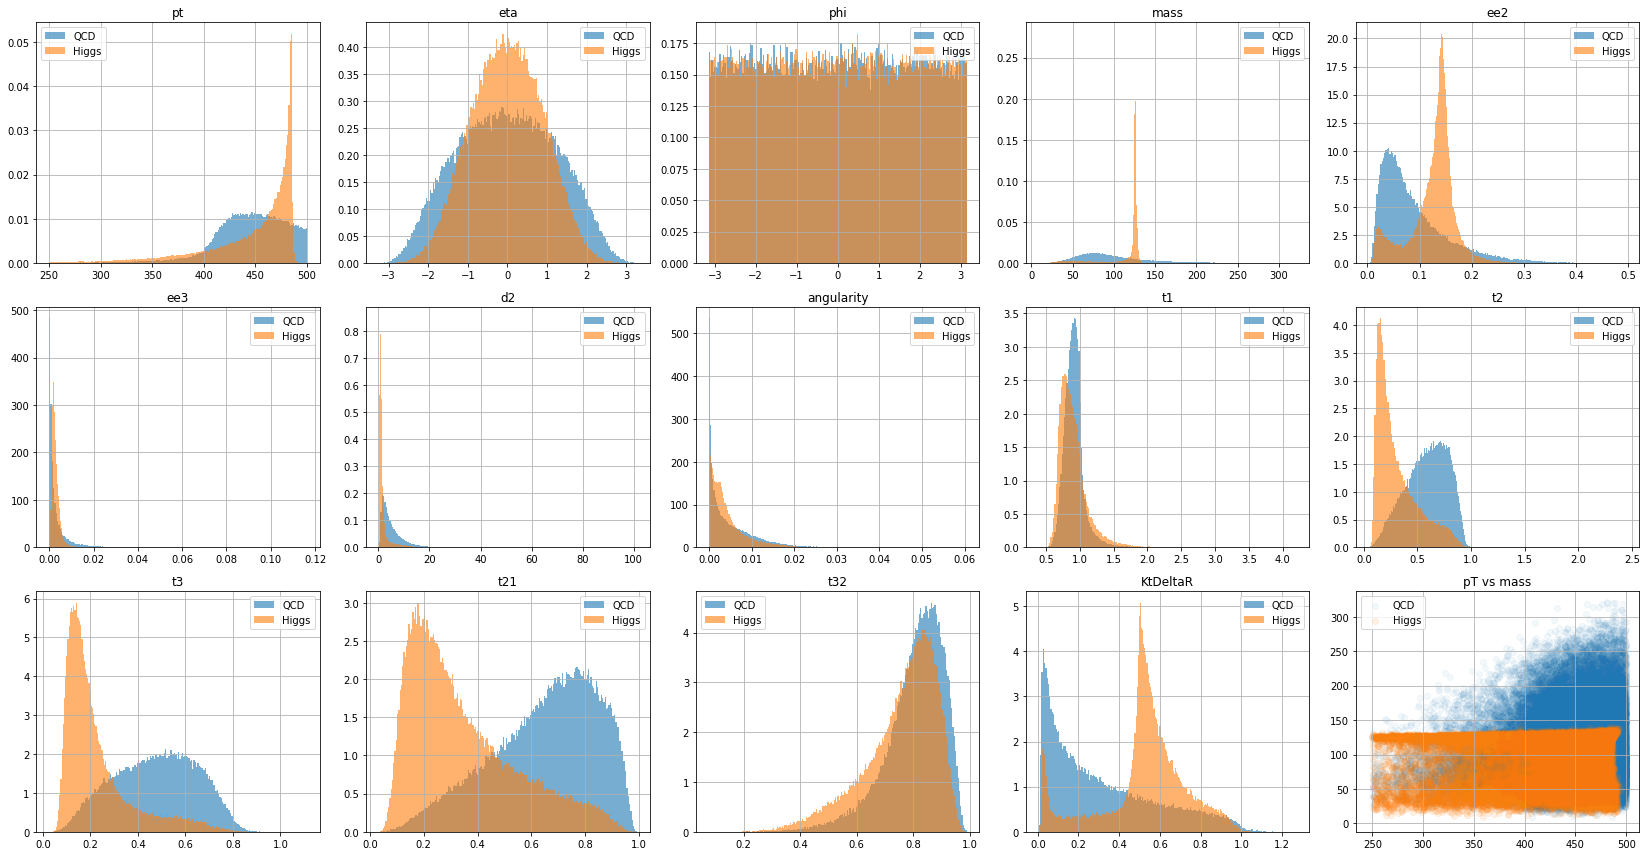

In [4]:
fig, ax = plt.subplots(3,5)
fig.set_size_inches(23,12)

for i in range(14):
    if i < 5:
        ax[0,i].hist(qcd[keys[i]],bins=200,density=True,label='QCD',alpha=0.6);
        ax[0,i].hist(higgs[keys[i]],bins=200,density=True,label='Higgs',alpha=0.6)
        ax[0,i].set_title(keys[i])
        ax[0,i].grid()
        ax[0,i].legend()
    if 5 <= i < 10:
        ax[1,i-5].hist(qcd[keys[i]],bins=200,density=True,label='QCD',alpha=0.6);
        ax[1,i-5].hist(higgs[keys[i]],bins=200,density=True,label='Higgs',alpha=0.6)
        ax[1,i-5].set_title(keys[i])
        ax[1,i-5].grid()
        ax[1,i-5].legend()
    if 10 <= i < 14:
        ax[2,i-10].hist(qcd[keys[i]],bins=200,density=True,label='QCD',alpha=0.6);
        ax[2,i-10].hist(higgs[keys[i]],bins=200,density=True,label='Higgs',alpha=0.6)
        ax[2,i-10].set_title(keys[i])
        ax[2,i-10].grid()
        ax[2,i-10].legend()

ax[2,4].scatter(qcd[keys[0]],qcd[keys[3]],label='QCD',alpha=0.05)
ax[2,4].scatter(higgs[keys[0]],higgs[keys[3]],label='Higgs',alpha=0.1)
ax[2,4].set_title('pT vs mass')
ax[2,4].legend()
ax[2,4].grid()

fig.tight_layout()

These plots (save the last) show the differences between features of background (QCD) and signal (Higgs) data. Some show obvious differences (like mass, ee2, t2/t3/t21, and KtDeltaR), and some are not so obvious (d2, angularity, and t32). It makes sense that phi shows almost complete overlapping of data, as it and eta (also strongly overlapping, though not as much) describe the angular space in which the jet propogates. These will not be candidates for constraint in the context of discriminating between signal and background. Before making stronger statements on that, here are the semi-log plots of some features which I deemed interesting:

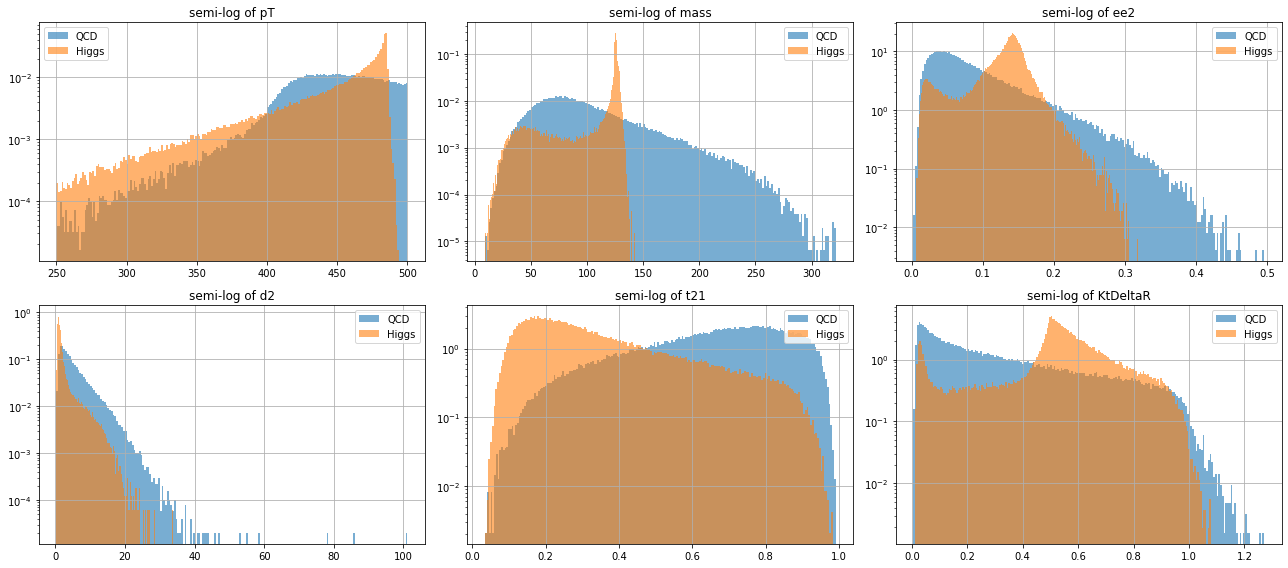

In [5]:
fig, ax = plt.subplots(2,3)
fig.set_size_inches(18,8)
        
ax[0,0].hist(qcd[keys[0]],bins=200,density=True,label='QCD',alpha=0.6,log=True)
ax[0,0].hist(higgs[keys[0]],bins=200,density=True,label='Higgs',alpha=0.6,log=True)
ax[0,0].set_title('semi-log of pT')

ax[0,1].hist(qcd[keys[3]],bins=200,density=True,label='QCD',alpha=0.6,log=True)
ax[0,1].hist(higgs[keys[3]],bins=200,density=True,label='Higgs',alpha=0.6,log=True)
ax[0,1].set_title('semi-log of mass')

ax[0,2].hist(qcd[keys[4]],bins=200,density=True,label='QCD',alpha=0.6,log=True)
ax[0,2].hist(higgs[keys[4]],bins=200,density=True,label='Higgs',alpha=0.6,log=True)
ax[0,2].set_title('semi-log of ee2')

ax[1,0].hist(qcd[keys[6]],bins=200,density=True,label='QCD',alpha=0.6,log=True)
ax[1,0].hist(higgs[keys[6]],bins=200,density=True,label='Higgs',alpha=0.6,log=True)
ax[1,0].set_title('semi-log of d2')

ax[1,1].hist(qcd[keys[11]],bins=200,density=True,label='QCD',alpha=0.6,log=True)
ax[1,1].hist(higgs[keys[11]],bins=200,density=True,label='Higgs',alpha=0.6,log=True)
ax[1,1].set_title('semi-log of t21')

ax[1,2].hist(qcd[keys[13]],bins=200,density=True,label='QCD',alpha=0.6,log=True)
ax[1,2].hist(higgs[keys[13]],bins=200,density=True,label='Higgs',alpha=0.6,log=True)
ax[1,2].set_title('semi-log of KtDeltaR')

for i in range(3):
    ax[0,i].grid()
    ax[0,i].legend()
    ax[1,i].grid()
    ax[1,i].legend()

fig.tight_layout()

We see here that mass steeply falls off around 140 GeV, whereas the background goes on past 300 GeV. This seems like a good candidate for discriminatory purposes. Same with ee2 - steep dropoff around 0.3 and a peak at 0.15, when the background goes on past 0.4 and peaks at 0.05. The rest are interestingly shaped... there might be a correlation between ee2 and KtDeltaR...

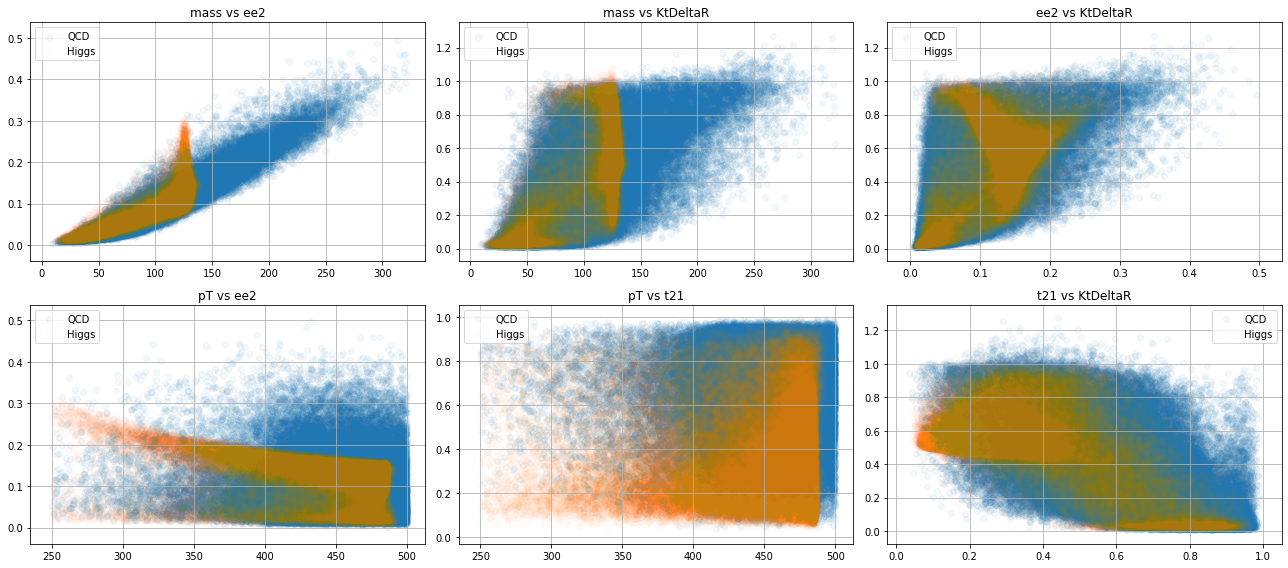

In [6]:
fig, ax = plt.subplots(2,3)
fig.set_size_inches(18,8)
        
ax[0,0].scatter(qcd[keys[3]],qcd[keys[4]],label='QCD',alpha=0.05)
ax[0,0].scatter(higgs[keys[3]],higgs[keys[4]],label='Higgs',alpha=0.01)
ax[0,0].set_title('mass vs ee2')

ax[0,1].scatter(qcd[keys[3]],qcd[keys[13]],label='QCD',alpha=0.05)
ax[0,1].scatter(higgs[keys[3]],higgs[keys[13]],label='Higgs',alpha=0.01)
ax[0,1].set_title('mass vs KtDeltaR')

ax[0,2].scatter(qcd[keys[4]],qcd[keys[13]],label='QCD',alpha=0.05)
ax[0,2].scatter(higgs[keys[4]],higgs[keys[13]],label='Higgs',alpha=0.01)
ax[0,2].set_title('ee2 vs KtDeltaR')

ax[1,0].scatter(qcd[keys[0]],qcd[keys[4]],label='QCD',alpha=0.05)
ax[1,0].scatter(higgs[keys[0]],higgs[keys[4]],label='Higgs',alpha=0.01)
ax[1,0].set_title('pT vs ee2')

ax[1,1].scatter(qcd[keys[0]],qcd[keys[11]],label='QCD',alpha=0.05)
ax[1,1].scatter(higgs[keys[0]],higgs[keys[11]],label='Higgs',alpha=0.02)
ax[1,1].set_title('pT vs t21')

ax[1,2].scatter(qcd[keys[11]],qcd[keys[13]],label='QCD',alpha=0.05)
ax[1,2].scatter(higgs[keys[11]],higgs[keys[13]],label='Higgs',alpha=0.01)
ax[1,2].set_title('t21 vs KtDeltaR')

for i in range(3):
    ax[0,i].grid()
    ax[0,i].legend()
    ax[1,i].grid()
    ax[1,i].legend()

fig.tight_layout()

Plot 1, mass vs ee2, definitely shows a correlation between features. There is a fairly linear increase for both datasets, until Higgs ceases to be correlated at a mass of 125 GeV for all ee2 values greater than 0.1.

Plot 2, mass vs KtDeltaR, does not show much correlation, although there are some interesting patterns between masses of 75 GeV to 110 GeV; then, at masses between 110 GeV and 140 GeV, it occupies all possible values of KtDelta R (since our signal dataset have no jets of mass greater than 140 GeV).

Plot 3, ee2 vs KtDeltaR (noted previously), also has a strange shape. It almost appears to fork into to ee2 values (0.9 or 0.2) with a KtDeltaR greater than 0.5. This makes sense - a large KtDeltaR is a large separation between two subjets, and a higher ee2 value represents a hard split between two subjets. Neat. So if ee2 is small, we have a softer shower of constituents, and this can refer to either a very small or very large value for the separation between two subjets. For the hardest ee2 in the Higgs dataset (larger than 0.15), this is correlated to a KtDeltaR of 0.5 +/- 0.2 separation, forking to the right and settling on 0.7 separation.

Plot 4, pT vs ee2, shows marginal correlation. One might be able to say that as pT increases, ee2 decreases. This is probably due to the fact that a jet with higher momentum has more showering of particles, creating softer jets.

Plot 5, pT vs t21, shows that for pT < 375 GeV, there is no correlation whatsoever, then pT > 375 GeV sees an exponential increase in the slope defining the boundary of possible t21 values, until at pT of 475 GeV, we can have all possible t21 values. For reminder, if t21 is very small, then it is far more likely for there to be two subjets. So, for transverse momentum between 400 and 450 GeV, we have a moderately okay chance of having two jets.

Plot 6, t21 vs KtDeltaR, shows t21 at small values being correlated with a KtDeltaR of 0.6 +/- 0.1, until 0.5, when it drops dowwn to 0. Meaning, the separation between two subjets sorted by KtDeltaR is zero for large values of t21. This makes sense, because a large value of t21 means that t1 was the better approximation (meaning, there is just one jet). For small t21, t2 is the better approximation, which is correlated to KtDeltaR separation of subjets of 0.6 +/- 0.1.

## Future Plans

As far as normalization goes, I believe the features which include ratios or computed separations are already normalized (this being the energy correlation functions and associated d, the n-subjettiness and associated ratios, and KtDeltaR). Phi and Eta should not be changed, since these are used to define the angular space which relates the jet to the beam. Transverse momentum, too, should not be normalized. This leaves us with mass. I believe that dividing all future jet masses by the maximum mass we have in the Higgs dataset, we can effectively throw out any jets with mass larger than 1 without disposing of possible signals and greatly increasing discovery sensitivities.

In [7]:
maxmass = np.max(higgs[keys[3]])
print(maxmass)
print("Since this number is ugly, I'll change it to 150 GeV for simplicity's sake.")

142.43960717193664
Since this number is ugly, I'll change it to 150 GeV for simplicity's sake.


In [8]:
higgs[keys[3]] = higgs[keys[3]] / 150.
qcd[keys[3]] = qcd[keys[3]] / 150.

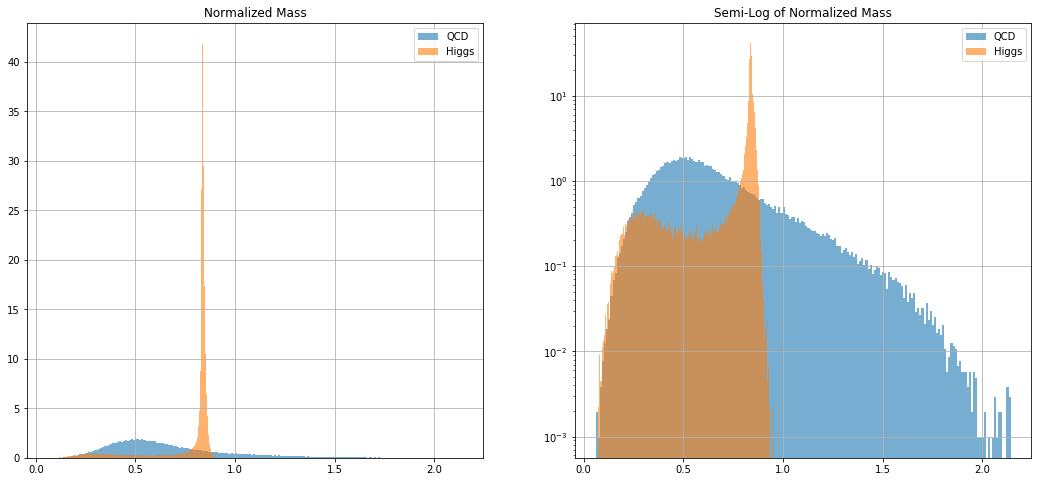

In [16]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(18,8)

ax[0].hist(qcd[keys[3]],bins=200,density=True,label='QCD',alpha=0.6)
ax[0].hist(higgs[keys[3]],bins=200,density=True,label='Higgs',alpha=0.6)
ax[0].set_title('Normalized Mass')

ax[1].hist(qcd[keys[3]],bins=200,density=True,label='QCD',alpha=0.6,log=True)
ax[1].hist(higgs[keys[3]],bins=200,density=True,label='Higgs',alpha=0.6,log=True)
ax[1].set_title('Semi-Log of Normalized Mass')

ax[0].grid()
ax[0].legend()
ax[1].grid()
ax[1].legend();

As for the discovery likelihood, I strongly suspect that LHC data would not look like these two datasets on top of each other. For every 200k jets, we probably won't be detecting 100k bb quarks from Higgs boson decays. However, our discovery likelyhood sharply increases if we discard masses of greater than 1...

In [42]:
good = 0
for i in range(99999):
    if qcd[keys[3]][i] < 1.0:
        good += 1.
    else:
        continue

In [45]:
frac = good / 100000.
print("The fraction of background data that won't be thrown out is {0:.3f}.".format(frac))

The fraction of background data that won't be thrown out is 0.8770.


Since I'm not happy with this answer, I've decided I'll also trash background data of masses less than 0.6, since it is an order of magnitude more likely for our Higgs dataset to have masses above that.

In [74]:
extragood = 0.
for i in range(99999):
    if 0.6 < qcd[keys[3]][i] < 1.0:
        extragood += 1.
    else:
        continue

In [75]:
extrafrac = extragood / 100000.
print("The fraction of background data remaining after throwing out jets of mass less than 0.6 and greater than 1.0 is {0:.4f}.".format(extrafrac))

The fraction of background data remaining after throwing out jets of mass less than 0.6 and greater than 1.0 is 0.3566.


Nice. Now only 35.66% of the background data will be plaguing our analysis, greatly increasing our chances of discovering a correct signal. Let's make sure we haven't thrown away too much of our signal data...

In [76]:
keep = 0.
for i in range(99999):
    if 0.6 < higgs[keys[3]][i] < 1.0:
        keep += 1.
    else:
        continue

In [77]:
kept = keep / 100000.
print("The fraction of signal data we still have after constraining mass is {0:.4f}.".format(kept))

The fraction of signal data we still have after constraining mass is 0.8664.


Hm. 86.64% signal retention post-constraint is worse than I pictured. I have to lower it to 0.3 to keep 95% of signal data, and by then, we're back up to keeping 82% of our background data. I think the next step would be constraining KtDeltaR.